## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from scipy.linalg import svd 
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:

from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [3]:
data = load_wine()
data1, target = load_wine(return_X_y=True,as_frame=True)
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [4]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
data1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
scaler = StandardScaler() 
scaled_data = pd.DataFrame(scaler.fit_transform(data1))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [7]:
scaled_data.columns = data1.columns
scaled_data.head(1)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.56225,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.84792,1.013009


In [8]:
cov = np.cov(scaled_data)
cov

array([[ 0.94194263,  0.70581209,  0.36507951, ..., -0.32366933,
        -0.25191907, -0.77261093],
       [ 0.70581209,  0.94151839,  0.29116368, ..., -0.44362127,
        -0.45417883, -0.87574038],
       [ 0.36507951,  0.29116368,  0.5512209 , ..., -0.4042183 ,
        -0.34622848, -0.50608494],
       ...,
       [-0.32366933, -0.44362127, -0.4042183 , ...,  1.56168742,
         1.25946005,  1.17306376],
       [-0.25191907, -0.45417883, -0.34622848, ...,  1.25946005,
         1.23413659,  1.03659322],
       [-0.77261093, -0.87574038, -0.50608494, ...,  1.17306376,
         1.03659322,  1.68537124]])

In [9]:
pca = PCA(n_components=2)
results = pca.fit_transform(scaled_data)
results = pd.DataFrame(results)

<AxesSubplot:xlabel='0', ylabel='1'>

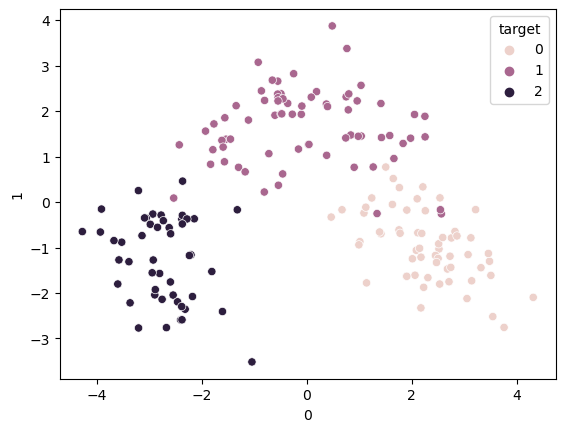

In [10]:
sns.scatterplot(x=results[0],y=results[1],hue=target)

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

In [11]:
from sklearn.decomposition import PCA
pca2 = PCA()
pca_fit = pca2.fit(scaled_data)

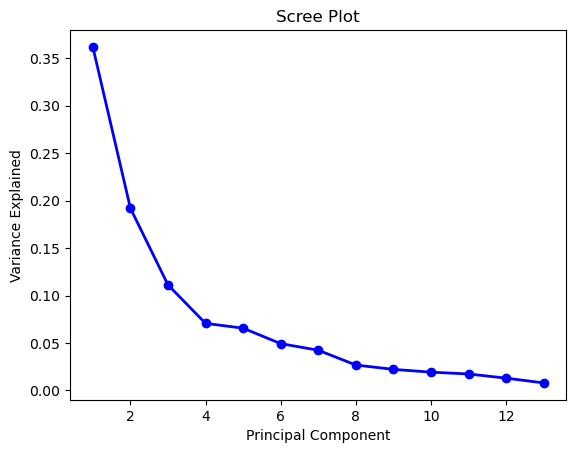

In [12]:
PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

<AxesSubplot:>

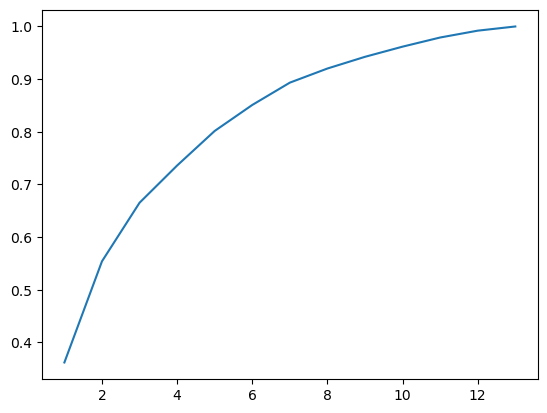

In [13]:
sns.lineplot(x=PC_values, y=np.cumsum(pca2.explained_variance_ratio_))

In [14]:
pca3 = PCA(n_components=4)
pca3.fit(scaled_data)
data3 = pca3.transform(scaled_data)
data3 = pd.DataFrame(data3)
data3.head(3)

,0,1,2,3
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902


In [15]:
data3.columns=['pc']+data3.columns.astype(str)
data3.head(1)

,pc0,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739,-0.215631


In [16]:
data3.to_csv('wine_recon.csv')

In [17]:
recon = pca3.inverse_transform(data3)
recon = pd.DataFrame(recon)
recon.columns=data1.columns
recon.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.215059,-0.619070,0.391824,-0.923622,0.957649,1.335937,1.340105,-0.933016,0.985479,0.479651,0.659179,0.942994,1.548858
1,0.583099,-0.953532,-1.316521,-1.783326,0.051356,0.496371,0.585856,-0.955204,0.260277,-0.113455,0.700612,0.495924,0.836374
2,0.645194,0.091541,0.780961,0.032453,0.539817,1.347572,1.319443,-0.701587,1.265510,0.236323,0.232485,1.073717,0.805154
3,1.901776,-0.011931,0.631514,-1.001610,1.136523,1.748784,1.639683,-1.187771,1.486230,1.189563,0.087118,1.035202,1.973674
4,0.153327,-0.091318,1.629779,0.964894,0.813046,0.669848,0.666760,0.152430,0.489785,0.066309,0.404475,0.497428,0.444931


3696396_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.